In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
# originally used openweathermapy but later decided to redo it the old-fashioned way
import openweathermapy.core as owm

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [29]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

In [32]:
# base url
url='http://api.openweathermap.org/data/2.5/weather?'
# initializing empty dataframe to later fill
cityweatherdf=pd.DataFrame(columns=('City', 'Cloudiness','Country', 'Date', 'Humidity', 'Lat', 'Lng', 'Max Temp', 'Wind Speed'))
externalcounter=0

for city in cities:
    # completingurl
    query_url= url+'&appid='+api_key+'&units=metric'+'&q='+city
    # The following code skips to the next loop if a city's weather data is not available on OWM 
    try:
        data=requests.get(query_url).json()
    except:
        print(city, "is not available on OWM")
        continue
    # Similarly, sometimes the data was not complete, or, oddly, it would give random errors for certain cities
    # Thus, the following code skips to the next loop, if such a city is queried.
    try:
        # Adding city data row by row to the initially empty dataframe
        cityweatherdf.loc[externalcounter]=[city]+[data['clouds']['all'],data['sys']['country'],data['dt'], data['main']['humidity'], data['coord']['lat'], data['coord']['lon'], data['main']['temp_max'], data['wind']['speed']]
    except:
        print(city, "is either not available on OWM at all or parts of the data are not available")
        continue
    # printing city count, and city name
    print(externalcounter,city)
    externalcounter=externalcounter+1

0 mataura
1 bredasdorp
2 inhambane
3 rikitea
4 farafangana
5 thessalon
6 cabo san lucas
7 sao filipe
8 chapais
9 hermosillo
10 new norfolk
11 klaksvik
12 albany
13 chenghai
14 robertson
15 hilo
16 grindavik
17 vaini
18 cayenne
19 medianeira
20 qaanaaq
21 punta arenas
imabari is either not available on OWM at all or parts of the data are not available
22 avera
23 isangel
24 vila
25 hobyo
26 campbell river
27 east london
28 fort smith
29 great yarmouth
30 francisco morato
illoqqortoormiut is either not available on OWM at all or parts of the data are not available
31 bluff
32 katsuura
33 port lincoln
34 shupiyan
35 palana
36 narsaq
belushya guba is either not available on OWM at all or parts of the data are not available
37 port alfred
38 bailen
39 verkhnyaya inta
40 brae
saleaula is either not available on OWM at all or parts of the data are not available
41 avarua
42 bontang
43 tuktoyaktuk
44 fairbanks
45 bambous virieux
46 touros
47 tura
48 san cristobal
tabiauea is either not availab

388 sorso
389 hamilton
390 carmelo
391 tevaitoa
392 mount isa
393 yatou
394 livingston
395 auki
396 sweetwater
397 lerwick
manzil jamil is either not available on OWM at all or parts of the data are not available
398 noumea
399 sokolo
400 deniliquin
attawapiskat is either not available on OWM at all or parts of the data are not available
401 port blair
402 morgan city
403 cayhagan
404 taoudenni
405 caravelas
406 obertyn
407 byron bay
408 iqaluit
409 dwarka
410 koumac
411 lavrentiya
412 ambilobe
413 azua
414 samarai
415 madimba
416 kailua
417 reconquista
418 derzhavinsk
419 dunedin
420 hanumangarh
421 ocampo
422 comodoro rivadavia
423 zabaykalsk
424 ati
425 luderitz
426 kirovskaya
427 turukhansk
428 vao
429 banfora
430 lorengau
431 vikulovo
432 starodub
433 saint-dizier
434 valley city
435 tual
436 tonantins
kerki is either not available on OWM at all or parts of the data are not available
437 xichang
438 kanakapura
439 bafq
440 letlhakeng
441 micco
skalistyy is either not available on 

In [33]:
# visualizing the now full dataframe
cityweatherdf

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,mataura,100,NZ,1576471386,71,-46.19,168.86,13.74,4.71
1,bredasdorp,30,ZA,1576471386,87,-34.53,20.04,9.00,2.10
2,inhambane,75,MZ,1576471386,88,-23.87,35.38,23.00,7.70
3,rikitea,37,PF,1576471387,75,-23.12,-134.97,22.31,8.87
4,farafangana,0,MG,1576471387,79,-22.82,47.83,26.92,3.24
5,thessalon,75,CA,1576471387,85,46.26,-83.55,-8.00,1.11
6,cabo san lucas,40,MX,1576471346,64,22.89,-109.91,22.22,5.10
7,sao filipe,93,CV,1576471387,81,14.90,-24.50,20.51,10.23
8,chapais,1,CA,1576471387,76,49.78,-74.86,-22.00,6.70
9,hermosillo,5,MX,1576471283,87,29.09,-110.96,17.22,1.50


In [35]:
# exporting dataframe to a CSV format
export_csv = cityweatherdf.to_csv(r'C:\Users\ekamj\Documents\Bootcamp homework\Homework 6\WeatherPy\cityweather_export.csv', index = True, header=True)

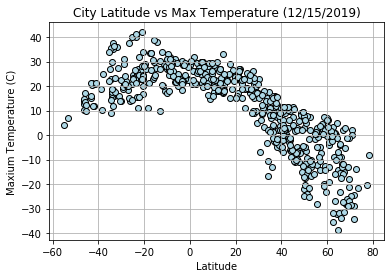

In [43]:
# Plotting a scatter plot, with light blue markers surrounded by black edges
fig, ax = plt.subplots()
ax.scatter(list(cityweatherdf['Lat']),list(cityweatherdf['Max Temp']),c='LightBlue',edgecolors="Black")
ax.set_title('City Latitude vs Max Temperature (12/15/2019)')        
ax.set_xlabel('Latitude')
ax.set_ylabel('Maxium Temperature (C)')
ax.axes.grid()
# saving figure
fig.savefig('latitude_temperature.png')
plt.show()

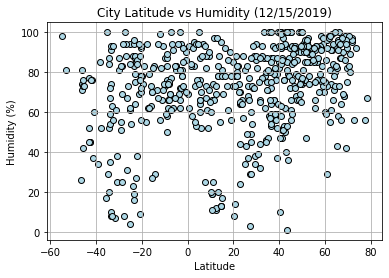

In [44]:
# Same as before, except this time the data plotted is city latitude vs. humidity
fig, ax = plt.subplots()
ax.scatter(list(cityweatherdf['Lat']),list(cityweatherdf['Humidity']),c='LightBlue',edgecolors="Black")
ax.set_title('City Latitude vs Humidity (12/15/2019)')        
ax.set_xlabel('Latitude')
ax.set_ylabel('Humidity (%)')
ax.axes.grid()
fig.savefig('latitude_humidity.png')
plt.show()

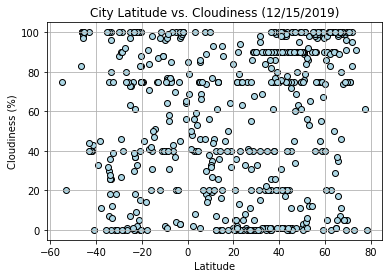

In [45]:
# Same as before... except this time the data plotted is city latitude vs. cloudiness
fig, ax = plt.subplots()
ax.scatter(list(cityweatherdf['Lat']),list(cityweatherdf['Cloudiness']),c='LightBlue',edgecolors="Black")
ax.set_title('City Latitude vs. Cloudiness (12/15/2019)')        
ax.set_xlabel('Latitude')
ax.set_ylabel('Cloudiness (%)')
ax.axes.grid()
fig.savefig('latitude_cloudiness.png')
plt.show()

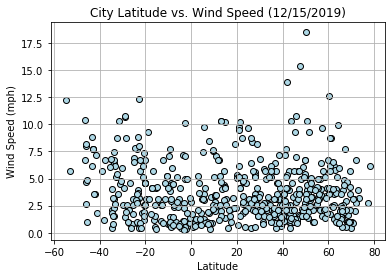

In [46]:
#... data plotted is city latitude vs Wind Speed
fig, ax = plt.subplots()
ax.scatter(list(cityweatherdf['Lat']),list(cityweatherdf['Wind Speed']),c='LightBlue',edgecolors="Black")
ax.set_title('City Latitude vs. Wind Speed (12/15/2019)')        
ax.set_xlabel('Latitude')
ax.set_ylabel('Wind Speed (mph)')
ax.axes.grid()
fig.savefig('latitude_wind_speed.png')
plt.show()